In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

# task 1

In [4]:
# data with information on edible and inedible mushrooms
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')


In [30]:
y = data['class']
x = data.drop('class',axis =1)


In [31]:
clf = RandomForestClassifier()
parameters = {'n_estimators':list(range(10,51,10)),
              'max_depth':list(range(1,12,2)),
             'min_samples_leaf':list(range(1,8)),
             'min_samples_split':list(range(2,9,2))}

gs_cv_clf = GridSearchCV(clf, parameters, cv=3,n_jobs=-1)
gs_cv_clf.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [32]:
gs_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [35]:
best_clf = gs_cv_clf.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'feature':list(x),
                                      'feature_importances':feature_importances})
feature_importances_df.sort_values(by = 'feature_importances',ascending =False )

,feature,feature_importances
7,gill-size,0.170318
8,gill-color,0.146591
12,stalk-surface-below-ring,0.122123
4,odor,0.106971
14,stalk-color-below-ring,0.054412
19,spore-print-color,0.052085
9,stalk-shape,0.050312
6,gill-spacing,0.049010
11,stalk-surface-above-ring,0.044935
13,stalk-color-above-ring,0.033593


In [36]:
x_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [37]:
predictions = best_clf.predict(x_test)

In [40]:
# count of inedible mushrooms (class =1)
predictions.sum()

976

In [42]:
y_true = pd.read_csv('testing_y_mush.csv')

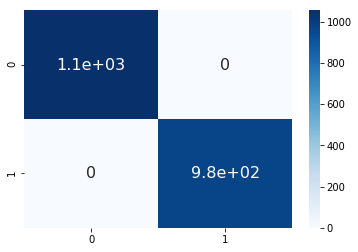

In [48]:
cm = confusion_matrix(y_true,predictions)
sns.heatmap(cm, annot=True,annot_kws={"size": 16},cmap="Blues")

# task 2

In [49]:
war_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [53]:
y = war_data['class']
x = war_data.drop('class',axis  =1)

In [56]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x,y)

C:\Python3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
x_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
predictions = clf_rf.predict(x_test)

In [62]:
pd.Series(predictions).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [64]:
feature_importances = clf_rf.feature_importances_
feature_importances_df = pd.DataFrame({'feature':list(x),
                                      'feature_importances':feature_importances})
feature_importances_df.sort_values(by = 'feature_importances',ascending =False )

,feature,feature_importances
5,volume,0.370526
3,brightness,0.276941
0,g_reflection,0.191908
2,speed,0.126929
1,i_reflection,0.033695
4,time_of_observance,0.000000


# task 3

In [68]:
regions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [69]:
regions_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [70]:
regions_data.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


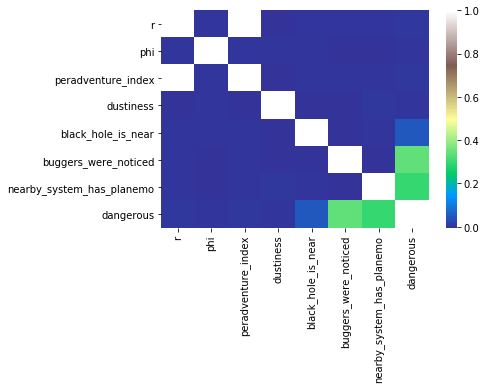

In [75]:
sns.heatmap(regions_data.corr(), cmap = 'terrain')